<a href="https://colab.research.google.com/github/FabricioS0/K-MeansT3/blob/main/K_means_Geisa_e_Fabricio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler




## *Carregamento dos dados*
---



In [ ]:
!gdown'1W6KLAK6VWeG6ZXUiYo-E1ITuHU-jGOOGkafG_XLkLbA'

/bin/bash: line 1: gdown1W6KLAK6VWeG6ZXUiYo-E1ITuHU-jGOOGkafG_XLkLbA: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
features_path = "/content/drive/MyDrive/COLAB ARQUIVOS/UCI HAR Dataset/train/X_train.txt"
labels_path = "/content/drive/MyDrive/COLAB ARQUIVOS/UCI HAR Dataset/train/y_train.txt"
x_treino = pd.read_csv(features_path, delim_whitespace=True, header=None)
y_treino = pd.read_csv(labels_path, delim_whitespace=True, header=None, names=['Activity'])

<ipython-input-4-75672c000877>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x_treino = pd.read_csv(features_path, delim_whitespace=True, header=None)
<ipython-input-4-75672c000877>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_treino = pd.read_csv(labels_path, delim_whitespace=True, header=None, names=['Activity'])


In [ ]:
print(x_treino.head(5))
print(y_treino.head(5))

        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205  0.123320   

        555       556       557       558       559       560  
0  0

In [ ]:
#Inserção dos nomes das variaveis

features_names_path = "/content/drive/MyDrive/COLAB ARQUIVOS/UCI HAR Dataset/features.txt"
features_names = pd.read_csv(features_names_path, delim_whitespace=True, header=None)[1].tolist()

# Aplicação dos nomes
x_treino.columns = features_names
print(x_treino.head())

<ipython-input-6-b69088db5299>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features_names = pd.read_csv(features_names_path, delim_whitespace=True, header=None)[1].tolist()


   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [ ]:
print(x_treino.head())

print(y_treino.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

# Verificação de Dados Ausentes e Remoção

In [ ]:
# Verificando valores nulos
x_treino.isnull().sum()
y_treino.isnull().sum()


,0
Activity,0


In [ ]:
# Remover linhas com valores ausentes (NaN)
x_treino.dropna(inplace=True)
y_treino.dropna(inplace=True)

# Distribuição dos dados

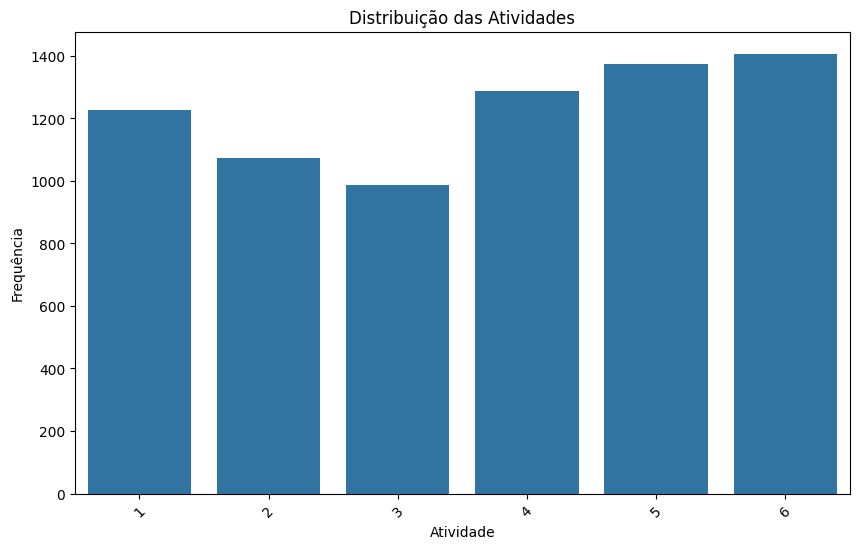

Activity
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [ ]:
#Distribuição do dados de Y_treino
plt.figure(figsize=(10, 6))

sns.countplot(x='Activity', data=y_treino)
plt.title('Distribuição das Atividades')
plt.xlabel('Atividade')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()
print(y_treino['Activity'].value_counts())

# Amostragem

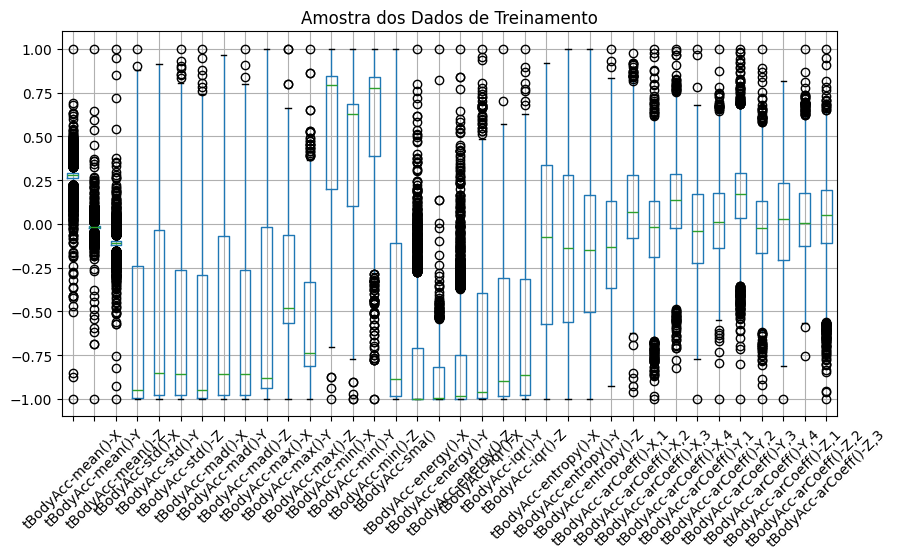

In [ ]:
# Verificando a existe de outliers em X-treino

amostra_x_treino = x_treino.columns[:36]

plt.figure(figsize=(10, 5))
x_treino[amostra_x_treino].boxplot()
plt.title('Amostra dos Dados de Treinamento')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Realizadno o trataemnto dos outliers de Xtreino.

Q3 = x_treino.quantile(0.75)
Q1 = x_treino.quantile(0.25)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
x_treino_outiliers = x_treino[~((x_treino < (Q1 - 1.5 * IQR)) | (x_treino > (Q3 + 1.5 * IQR))).any(axis=1)]


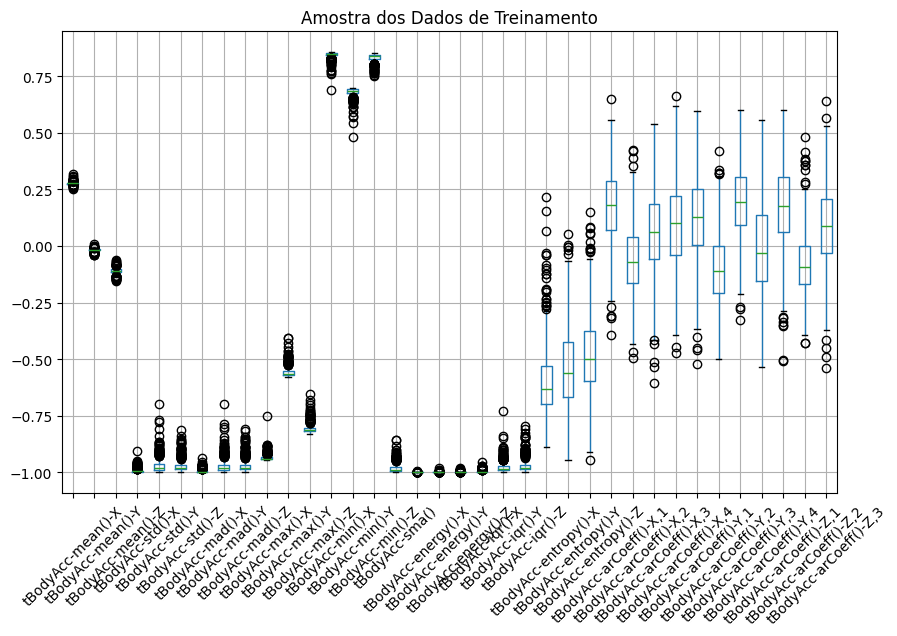

In [ ]:
#Verificando se outliers foram tratados de X-treino

amostra_x_treino_outiliers = x_treino_outiliers.columns[:36]

plt.figure(figsize=(10, 6))
x_treino_outiliers[amostra_x_treino_outiliers].boxplot()
plt.title('Amostra dos Dados de Treinamento')
plt.xticks(rotation=45)
plt.show()

# PRIMEIRO METODO - STANDARDSCALER

        0         1         2         3         4         5         6    \
0  0.362174 -0.430057 -0.078426 -0.494719  0.076164 -0.432002 -0.478758   
1  0.170921 -0.570527 -0.315609 -0.761929 -0.468425 -0.925347 -0.787547   
2  0.492828  0.608761  0.241223 -0.588126 -0.556698 -0.705351 -0.629387   
3 -0.079371 -0.129246  0.221030 -0.596370 -0.632704 -0.937025 -0.670557   
4 -1.277316  0.518738  0.227920 -0.124776 -0.732987 -0.820204 -0.013506   

        7         8         9    ...       551       552       553       554  \
0  0.133865 -0.440075 -0.406036  ... -0.191720  0.797625  0.791437 -1.686456   
1 -0.414817 -0.915982 -0.621109  ...  1.999762 -1.064403 -0.771706 -0.645083   
2 -0.578294 -0.764905 -0.486295  ...  0.947298  0.354330  0.630160 -0.265975   
3 -0.634146 -0.926368 -0.441827  ...  1.542343 -1.706557 -1.127263 -0.065625   
4 -0.714367 -0.786314 -0.452487  ... -0.559276 -0.049851 -0.495353  0.448262   

        555       556       557       558       559       560  
0 -0

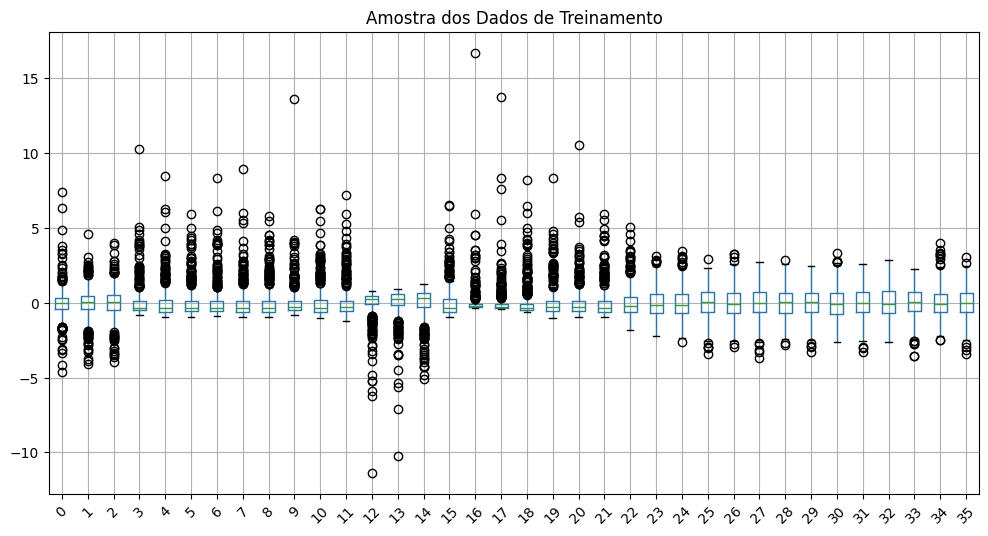

In [ ]:
#Normatização dos dados utilizados. PRIMEIRO MÉTODO

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_treino_outiliers)

#retorno para dataset e visualização
x_treino_normatized_Scaler = pd.DataFrame(x_scaled)
print(x_treino_normatized_Scaler.head())

#Verificando se outliers foram tratados de X-treino
amostra_x_treino_normatized_Scaler = x_treino_normatized_Scaler.columns[:36]

plt.figure(figsize=(12, 6))
x_treino_normatized_Scaler[amostra_x_treino_normatized_Scaler].boxplot()
plt.title('Amostra dos Dados de Treinamento')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Redução de dimensionalidade para visualização (2D)
pca = PCA(n_components= 2)
x_pca_Scaler = pca.fit_transform(x_treino_normatized_Scaler)

# Treinamento do K-means
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(x_pca_Scaler)

KMeans(n_clusters=6, random_state=42)

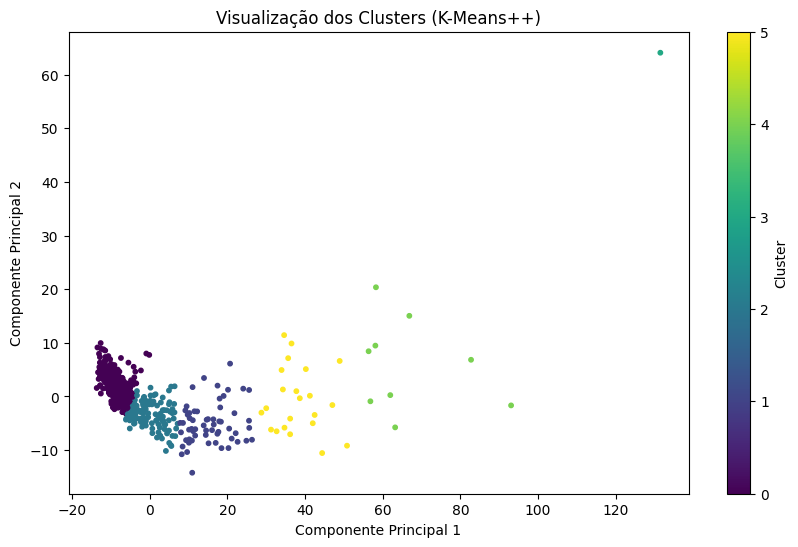

In [ ]:
# Visualização dos clusters
labels = kmeans.labels_
plt.figure(figsize=(10, 6))
plt.scatter(x_pca_Scaler[:, 0], x_pca_Scaler[:, 1], c=labels, cmap='viridis', s=10)
plt.title('Visualização dos Clusters (K-Means++)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

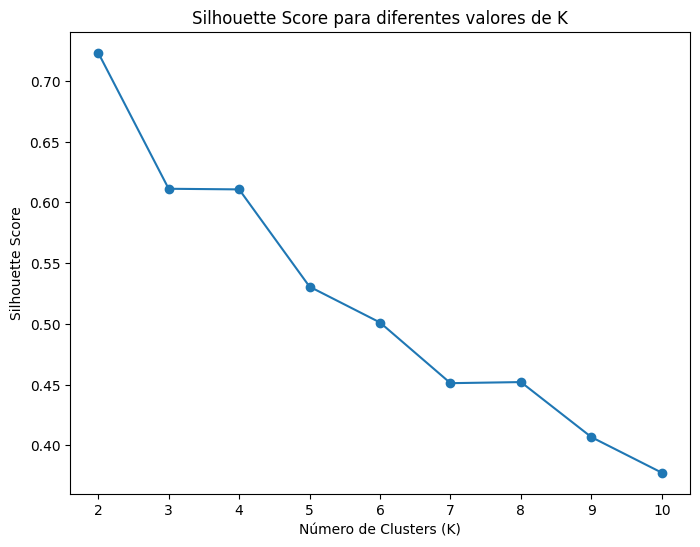


Número ideal de clusters com base no Silhouette Score: K=2
[0.7232050159432712, 0.6111996730553153, 0.6106849452578119, 0.530582723455016, 0.5010847790142385, 0.4511526810351601, 0.45204558724935434, 0.4067376774787459, 0.3774252783910671]


In [ ]:
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(x_pca_Scaler)
    score = silhouette_score(x_pca_Scaler, clusters)
    silhouette_scores.append(score)
    plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, '-o')
plt.title("Silhouette Score para diferentes valores de K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()
best_k = K_range[np.argmax(silhouette_scores)]
print(f"\nNúmero ideal de clusters com base no Silhouette Score: K={best_k}")
print (silhouette_scores)

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(x_pca_Scaler)
silhouette_avg = silhouette_score(x_pca_Scaler, clusters)
print(f"Silhouette Score após redução de dimensionalidade: {silhouette_avg:.4f}")

Silhouette Score após redução de dimensionalidade: 0.7232


# SEGUNDO MÉTODO - ROBUSTSCALER

        0         1         2         3         4         5         6    \
0  0.525725 -0.546882 -0.117525 -0.283168  0.557074 -0.116582 -0.246608   
1  0.261485 -0.704856 -0.365110 -0.724771 -0.169724 -0.811242 -0.739121   
2  0.706240  0.621380  0.216144 -0.437537 -0.287531 -0.501474 -0.486859   
3 -0.084326 -0.208588  0.195065 -0.451161 -0.388968 -0.827685 -0.552524   
4 -1.739440  0.520140  0.202258  0.328218 -0.522804 -0.663193  0.495460   

        7         8         9    ...       551       552       553       554  \
0  0.629411 -0.110876 -0.202313  ... -0.195378  0.617943  0.827931 -2.186686   
1 -0.121638 -0.760003 -0.558746  ...  1.343144 -0.660605 -0.362842 -0.852732   
2 -0.345408 -0.553938 -0.335324  ...  0.604266  0.313558  0.705073 -0.367111   
3 -0.421859 -0.774170 -0.261628  ...  1.022015 -1.101536 -0.633699 -0.110471   
4 -0.531667 -0.583138 -0.279294  ... -0.453419  0.036030 -0.152322  0.547796   

        555       556       557       558       559       560  
0 -0

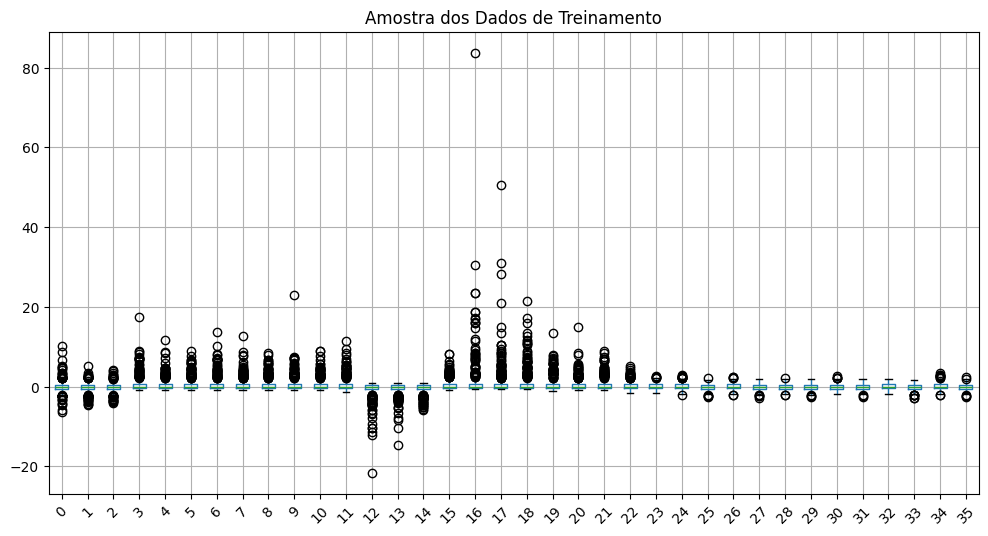

In [ ]:
#SEGUNDO MÉTODO - ROBUSTSCALER
scaler = RobustScaler()
features_scaled = scaler.fit_transform(x_treino_outiliers)
x_treino_normatized_roubust = pd.DataFrame(features_scaled)
print(x_treino_normatized_roubust.head())

#Verificando Normatização dos dados com o RobustScaler
amostra_x_treino_normatized_roubust = x_treino_normatized_roubust.columns[:36]
plt.figure(figsize=(12, 6))
x_treino_normatized_roubust[amostra_x_treino_normatized_roubust].boxplot()
plt.title('Amostra dos Dados de Treinamento')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Redução de dimensionalidade para visualização (2D)
pca = PCA(n_components= 2)
x_pca_roubust = pca.fit_transform(x_treino_normatized_roubust)

# Treinamento do K-means
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(x_pca_roubust)

KMeans(n_clusters=6, random_state=42)

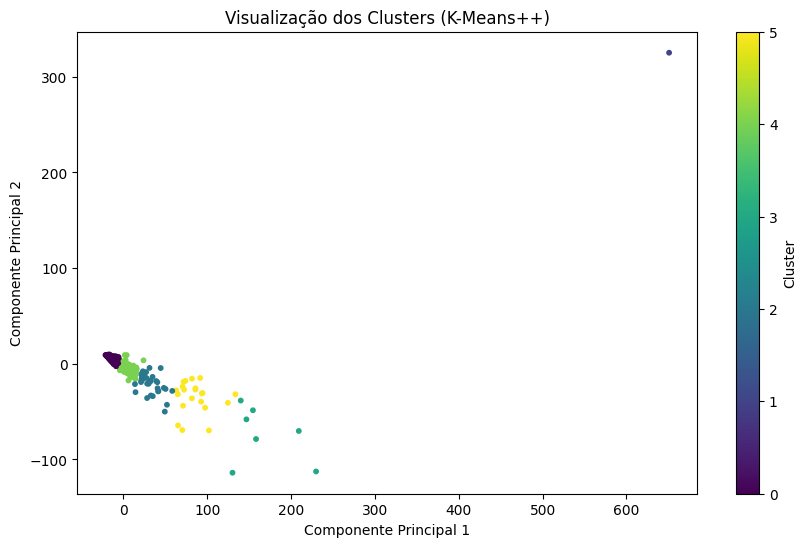

In [ ]:
# Visualização dos clusters
labels = kmeans.labels_
plt.figure(figsize=(10, 6))
plt.scatter(x_pca_roubust[:, 0], x_pca_roubust[:, 1], c=labels, cmap='viridis', s=10)
plt.title('Visualização dos Clusters (K-Means++)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

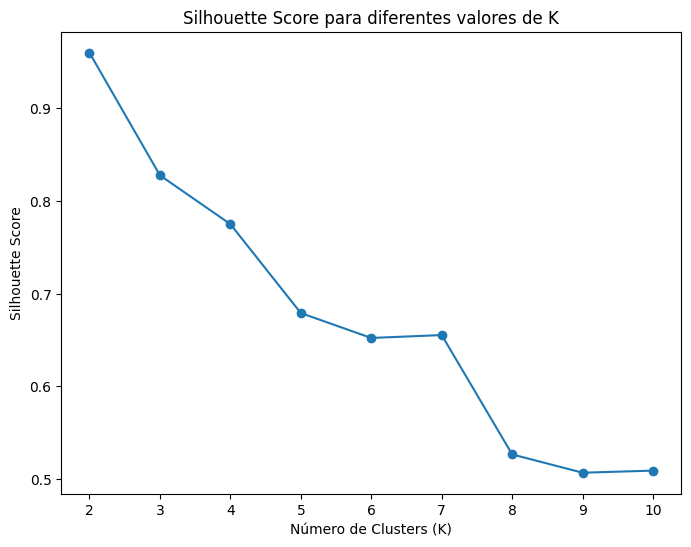


Número ideal de clusters com base no Silhouette Score: K=2
[0.9594102393436313, 0.8273684295066589, 0.7747618777405687, 0.6789547254626417, 0.6521508994441862, 0.6552533023290122, 0.5266970286130153, 0.5069725786843194, 0.5092478428867873]


In [ ]:
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(x_pca_roubust)
    score = silhouette_score(x_pca_roubust, clusters)
    silhouette_scores.append(score)
    plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, '-o')
plt.title("Silhouette Score para diferentes valores de K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()
best_k = K_range[np.argmax(silhouette_scores)]
print(f"\nNúmero ideal de clusters com base no Silhouette Score: K={best_k}")
print (silhouette_scores)

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(x_pca_roubust)
silhouette_avg = silhouette_score(x_pca_roubust, clusters)
print(f"Silhouette Score após redução de dimensionalidade: {silhouette_avg:.4f}")

Silhouette Score após redução de dimensionalidade: 0.9594


# TERCEIRO METODO - MAXABSSCALER


In [ ]:
#Normalização de dados

scaler = MaxAbsScaler()
features_scaled = scaler.fit_transform(x_treino_outiliers)
x_treino_normatized_max = pd.DataFrame(features_scaled)
print(x_treino_normatized_max.head())

        0         1         2         3         4         5         6    \
0  0.884200 -0.491960 -0.713782 -0.997203 -0.967309 -0.985811 -0.997386   
1  0.881046 -0.511347 -0.731360 -0.999417 -0.984805 -0.999003 -0.999460   
2  0.886355 -0.348590 -0.690091 -0.997977 -0.987641 -0.993120 -0.998398   
3  0.876918 -0.450444 -0.691588 -0.998045 -0.990083 -0.999315 -0.998674   
4  0.857161 -0.361014 -0.691077 -0.994137 -0.993305 -0.996191 -0.994260   

        7         8         9    ...       551       552       553       554  \
0 -0.966097 -0.985424 -0.994014  ...  0.196165 -0.243506 -0.572169 -0.389717   
1 -0.982937 -0.998750 -0.997098  ...  0.927939 -0.769527 -0.890799 -0.142057   
2 -0.987954 -0.994520 -0.995165  ...  0.576503 -0.368737 -0.605044 -0.051897   
3 -0.989669 -0.999041 -0.994527  ...  0.775199 -0.950935 -0.963275 -0.004250   
4 -0.992131 -0.995119 -0.994680  ...  0.073432 -0.482917 -0.834467  0.117963   

        555       556       557       558       559       560  
0 -0

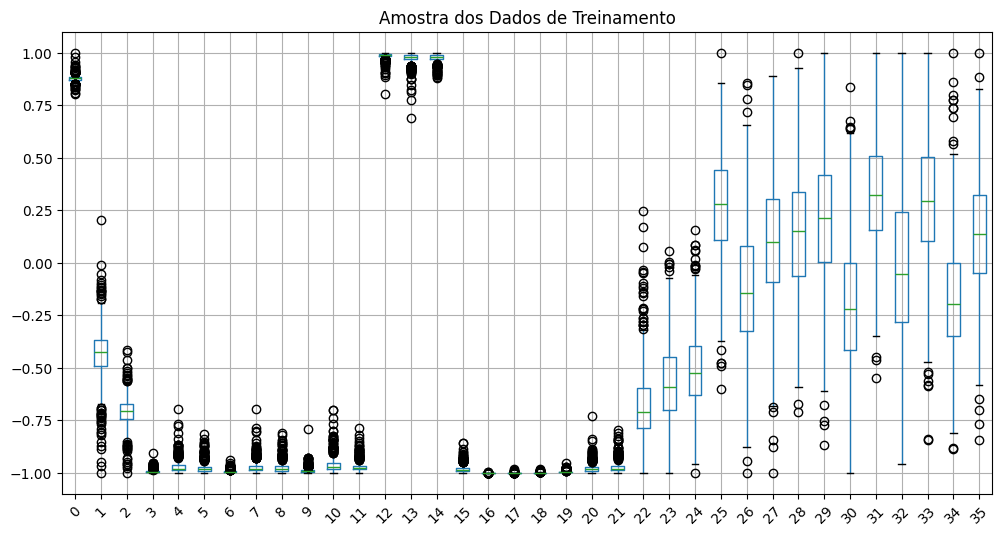

In [ ]:
#Verificando se outliers foram tratados de X-treino

amostra_x_treino_normatized_max = x_treino_normatized_max.columns[:36]

plt.figure(figsize=(12, 6))
x_treino_normatized_max[amostra_x_treino_normatized_max].boxplot()
plt.title('Amostra dos Dados de Treinamento')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Redução de dimensionalidade para visualização (2D)
pca = PCA(n_components= 2)
x_pca_max = pca.fit_transform(x_treino_normatized_max)

# Treinamento do K-means
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(x_pca_max)

KMeans(n_clusters=6, random_state=42)

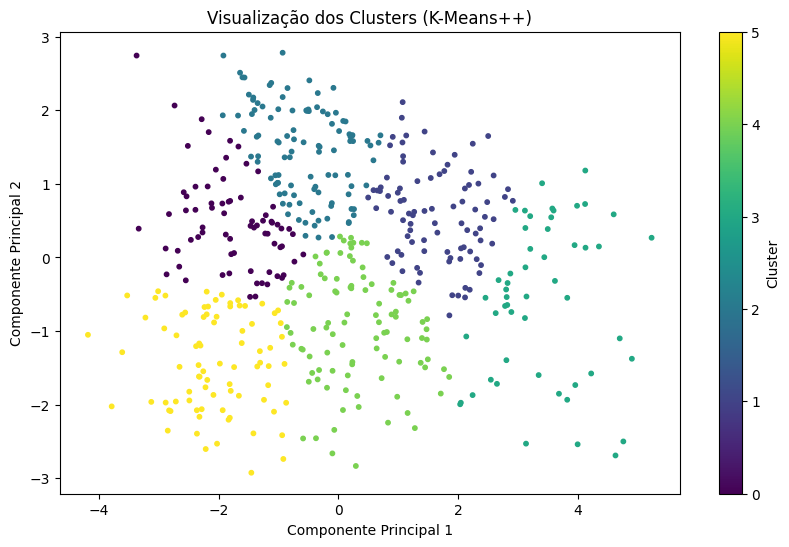

In [ ]:
# Visualização dos clusters
labels = kmeans.labels_
plt.figure(figsize=(10, 6))
plt.scatter(x_pca_max[:, 0], x_pca_max[:, 1], c=labels, cmap='viridis', s=10)
plt.title('Visualização dos Clusters (K-Means++)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

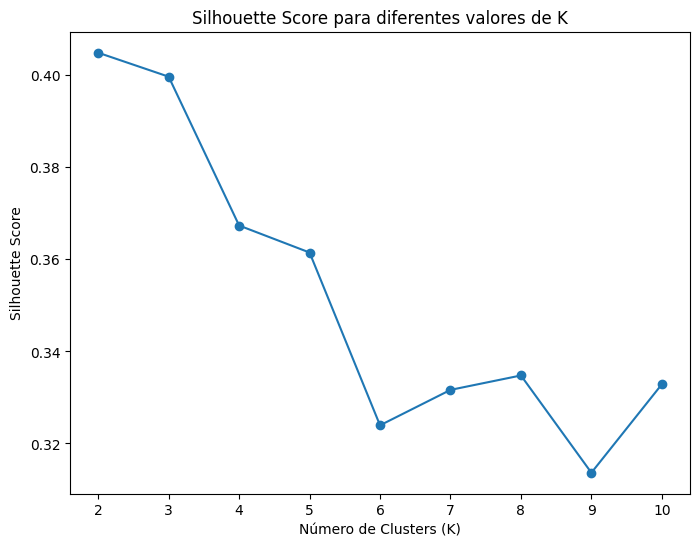


Número ideal de clusters com base no Silhouette Score: K=2
[0.40490184356726133, 0.39969542527046087, 0.36735507500521974, 0.3614880171949216, 0.32394587517368467, 0.3316426588210555, 0.3347767336110534, 0.31364436346528296, 0.33286010253734943]


In [ ]:
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(x_pca_max)
    score = silhouette_score(x_pca_max, clusters)
    silhouette_scores.append(score)
    plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, '-o')
plt.title("Silhouette Score para diferentes valores de K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()
best_k = K_range[np.argmax(silhouette_scores)]
print(f"\nNúmero ideal de clusters com base no Silhouette Score: K={best_k}")
print (silhouette_scores)

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(x_pca_max)
silhouette_avg = silhouette_score(x_pca_max, clusters)
print(f"Silhouette Score após redução de dimensionalidade: {silhouette_avg:.4f}")

Silhouette Score após redução de dimensionalidade: 0.4049
